SMILES, VALUES AND GRAPHS

In [28]:
import pandas as pd
import numpy as np
from rdkit import Chem, DataStructs
from rdkit.Chem import Descriptors, rdMolDescriptors, PandasTools, AllChem, MACCSkeys, AtomPairs, rdFingerprintGenerator
from rdkit.Chem import MACCSkeys
from rdkit.Chem.rdmolops import PatternFingerprint
from mordred import Calculator, descriptors
import os
import tqdm
import seaborn as sns
import matplotlib.pyplot as plt


In [29]:
import pandas as pd
import numpy as np
import warnings

from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem, PandasTools, MACCSkeys, AtomPairs, rdFingerprintGenerator
from rdkit import DataStructs
from rdkit.Chem.rdmolops import PatternFingerprint
from rdkit.Avalon import pyAvalonTools
from rdkit.Chem.AtomPairs.Pairs import GetAtomPairFingerprintAsBitVect
pd.set_option('display.max_rows', None)

warnings.filterwarnings("ignore")
     

In [30]:
from Functions import *

In [31]:
df = pd.read_csv("data/OROP_updated.csv", usecols=range(9), header=None)
# ['system_number', 'dG_red', 'Solvent', 'Charge_gn', 'Charge_rd','UHF_gn', 'UHF_rd', 'SMILES_1', 'NumAtoms_1']
df.head() 

,0,1,2,3,4,5,6,7,8
0,system_number,dG_red,Solvent,Charge_gn,Charge_rd,UHF_gn,UHF_rd,SMILES_1,NumAtoms_1
1,49,1.41,acetonitrile,1,0,1,0,COc1ccccc1O,17
2,181,-1.1,acetonitrile,0,-1,0,1,O=C(O)c1ccccc1-c1c2cc(Br)c(=O)c(Br)c-2oc2c(Br)...,37
3,52,1.69,acetonitrile,1,0,1,0,Oc1ccc(Br)cc1,13
4,27,1.73,acetonitrile,1,0,1,0,CC=Cc1ccc(Cl)cc1,19


In [32]:
df.rename(columns={0: 'system_number', 1: 'dG_red', 2: 'Solvent', 3: 'Charge_gn', 4: 'Charge_rd', 5: 'UHF_gn', 6: 'UHF_rd', 7: 'SMILES_1', 8: 'NumAtoms_1'}, inplace=True)

df.drop(0, inplace=True)

df.pop("Solvent")

df.head()

,system_number,dG_red,Charge_gn,Charge_rd,UHF_gn,UHF_rd,SMILES_1,NumAtoms_1
1,49,1.41,1,0,1,0,COc1ccccc1O,17
2,181,-1.1,0,-1,0,1,O=C(O)c1ccccc1-c1c2cc(Br)c(=O)c(Br)c-2oc2c(Br)...,37
3,52,1.69,1,0,1,0,Oc1ccc(Br)cc1,13
4,27,1.73,1,0,1,0,CC=Cc1ccc(Cl)cc1,19
5,139,1.67,1,0,1,0,C(=Nc1ccccc1)c1ccccc1,25


FINGERPRINTS

maccs and pattern figerprint

In [33]:
PandasTools.AddMoleculeColumnToFrame(df,'SMILES_1','Mol')
df.head()

[14:10:47] SMILES Parse Error: syntax error while parsing: =Cc1ccc2ccccc2c1
[14:10:47] SMILES Parse Error: Failed parsing SMILES '=Cc1ccc2ccccc2c1' for input: '=Cc1ccc2ccccc2c1'


,system_number,dG_red,Charge_gn,Charge_rd,UHF_gn,UHF_rd,SMILES_1,NumAtoms_1,Mol
1,49,1.41,1,0,1,0,COc1ccccc1O,17,<rdkit.Chem.rdchem.Mol object at 0x000002988D1...
2,181,-1.1,0,-1,0,1,O=C(O)c1ccccc1-c1c2cc(Br)c(=O)c(Br)c-2oc2c(Br)...,37,<rdkit.Chem.rdchem.Mol object at 0x000002988D1...
3,52,1.69,1,0,1,0,Oc1ccc(Br)cc1,13,<rdkit.Chem.rdchem.Mol object at 0x000002988D1...
4,27,1.73,1,0,1,0,CC=Cc1ccc(Cl)cc1,19,<rdkit.Chem.rdchem.Mol object at 0x000002988D1...
5,139,1.67,1,0,1,0,C(=Nc1ccccc1)c1ccccc1,25,<rdkit.Chem.rdchem.Mol object at 0x000002988D1...


In [34]:
# df.pop("Mol")
# mol_list = []
# for smile in df['SMILES_1']:
#   mol = Chem.MolFromSmiles(smile)
# #  mol = Chem.AddHs(mol)
#   mol_list.append(mol)
# df = pd.concat([df, pd.DataFrame(mol_list, columns = (['Mol']))], axis=1)
# df

In [35]:
df_maccs = []

# run a for loop to iterate through each molecule
for mol in df['Mol']:
# generate bitvector object
  if mol is not None:
    # Generate MACCS keys
    maccs_bitvector = MACCSkeys.GenMACCSKeys(mol)
# create an empty array
    arr = np.zeros((0,), dtype=np.int8)
# convert the RDKit explicit vectors into numpy arrays
    DataStructs.ConvertToNumpyArray(maccs_bitvector,arr)
# append the array to the empty list
    df_maccs.append(arr)

MACCS = pd.concat([df['SMILES_1'], pd.DataFrame(df_maccs)], axis=1)
MACCS.head()

,SMILES_1,0,1,2,3,4,5,6,7,8,...,157,158,159,160,161,162,163,164,165,166
1,COc1ccccc1O,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0
2,O=C(O)c1ccccc1-c1c2cc(Br)c(=O)c(Br)c-2oc2c(Br)...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0
3,Oc1ccc(Br)cc1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
4,CC=Cc1ccc(Cl)cc1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0
5,C(=Nc1ccccc1)c1ccccc1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0


In [36]:

df_pf = []
for mol in df['Mol']:
  if mol is not None:
    pf_bitvector = PatternFingerprint(mol)
    arr = np.zeros((0,), dtype=np.int8)
    DataStructs.ConvertToNumpyArray(pf_bitvector,arr)
    df_pf.append(arr)

PF = pd.concat([df['SMILES_1'], pd.DataFrame(df_pf)], axis=1)
PF.head()

,SMILES_1,0,1,2,3,4,5,6,7,8,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
1,COc1ccccc1O,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,O=C(O)c1ccccc1-c1c2cc(Br)c(=O)c(Br)c-2oc2c(Br)...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Oc1ccc(Br)cc1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,CC=Cc1ccc(Cl)cc1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,C(=Nc1ccccc1)c1ccccc1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Generation of 0D and 1D descriptors

In [37]:
df.head()

,system_number,dG_red,Charge_gn,Charge_rd,UHF_gn,UHF_rd,SMILES_1,NumAtoms_1,Mol
1,49,1.41,1,0,1,0,COc1ccccc1O,17,<rdkit.Chem.rdchem.Mol object at 0x000002988D1...
2,181,-1.1,0,-1,0,1,O=C(O)c1ccccc1-c1c2cc(Br)c(=O)c(Br)c-2oc2c(Br)...,37,<rdkit.Chem.rdchem.Mol object at 0x000002988D1...
3,52,1.69,1,0,1,0,Oc1ccc(Br)cc1,13,<rdkit.Chem.rdchem.Mol object at 0x000002988D1...
4,27,1.73,1,0,1,0,CC=Cc1ccc(Cl)cc1,19,<rdkit.Chem.rdchem.Mol object at 0x000002988D1...
5,139,1.67,1,0,1,0,C(=Nc1ccccc1)c1ccccc1,25,<rdkit.Chem.rdchem.Mol object at 0x000002988D1...


In [38]:

descriptor_list = []
for idx, row in df.iterrows():
    mol = row['Mol']
    number = row['system_number']
    red = row['dG_red']
    if pd.isna(mol):
        continue

    descriptors = generate_descriptors(mol, row, number, red)
    if descriptors is not None:
        descriptor_list.append(descriptors)

# Create a DataFrame from the descriptor list
output_data = pd.DataFrame(descriptor_list)
output_data.head()



,System_number,dG_red,MolWt,NumAtoms,NumHeteroatoms,NumRings,NumRotatableBonds,TPSA,LogP,NumHBD,NumHBA,FractionCSP3
0,49,1.41,124.139,9,2,1,1,29.46,1.4008,1,2,0.142857
1,181,-1.1,647.895,29,9,4,2,87.74,7.0186,2,4,0.000000
2,52,1.69,173.009,8,2,1,0,20.23,2.1547,1,1,0.000000
3,27,1.73,152.624,10,1,1,1,0.00,3.3731,0,0,0.111111
4,139,1.67,181.238,14,1,2,2,12.36,3.4372,0,1,0.000000


In [39]:
# df statistics
# ticks = []
# max = output_data['dG_red'].max()
# print(max)
# print(min)
# min = output_data['dG_red'].min()
# rng = float(max) - float(min)
# thi = rng/10
# print(thi)
# tmp = float(min)
# ticks.append(float(min)-(float(min)*0.1))
# for i in range(10):
#     tmp += thi
#     ticks.append(round(tmp, 6))
# ticks.append(float(max)+(float(max)*0.1))
# print(ticks)


In [40]:
# output_data.sort_values(by='dG_red',ascending=True)
# output_data.head()
# out_agg = output_data.groupby(['dG_red'], as_index=False)["MolWt"].sum()
# out_agg.head()

In [41]:
output_data['dG_red'] = output_data['dG_red'].astype('float')

Molar Mass

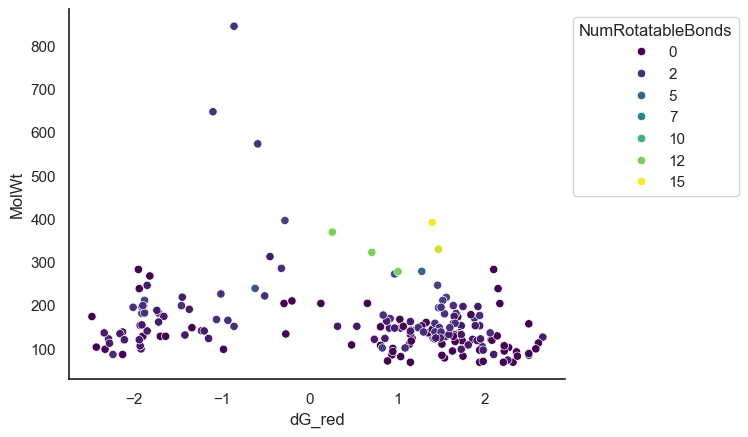

In [47]:
sns.set_style('white') # Try 'darkgrid', 'whitegrid', 'dark', 'white', 'ticks'
sns.set_context('notebook') # Try 'paper', 'poster', 'notebook' and see how it changes the looks
#plt.xticks(ticks)

#plt.yscale('log')
#plt.xscale('linear')
ax = sns.scatterplot(data=output_data, x='dG_red', y='MolWt', hue='NumRotatableBonds',
                      legend='brief', palette='viridis')
#ax = sns.scatterplot(data=output_data, x='MolWt', y='dG_red', hue='NumRotatableBonds', legend='brief')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

"""for ind, label in enumerate(ax.get_xticklabels()):
    if ind % 11 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)"""

# for ind, label in enumerate(ax.get_yticklabels()):
#     if ind % -10 == 0:  # every 10th label is kept
#         label.set_visible(True)
#     else:
#         label.set_visible(False)

#ax.tick_params(left=False, bottom=False, right=False, top=False)
#plt.tight_layout()
sns.despine()

Number of atoms

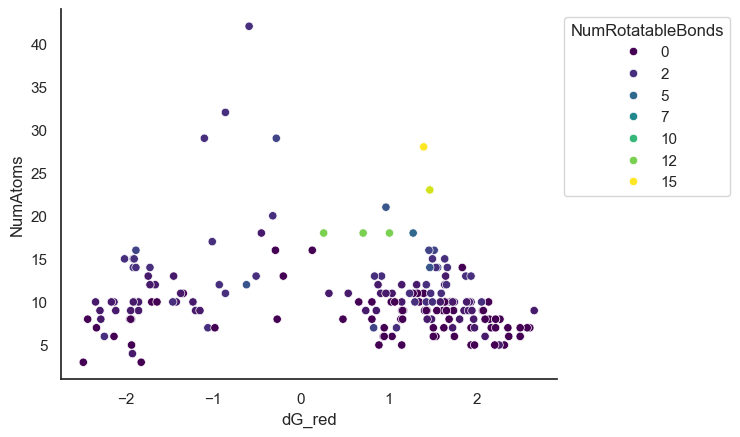

In [59]:
sns.set_style('white') # Try 'darkgrid', 'whitegrid', 'dark', 'white', 'ticks'
sns.set_context('notebook') # Try 'paper', 'poster', 'notebook' and see how it changes the looks

#plt.yscale('log')
#plt.xscale('linear')
ax = sns.scatterplot(data=output_data, x='dG_red', y='NumAtoms', hue='NumRotatableBonds',
                      legend='brief', palette='viridis')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

sns.despine()

TPSA	

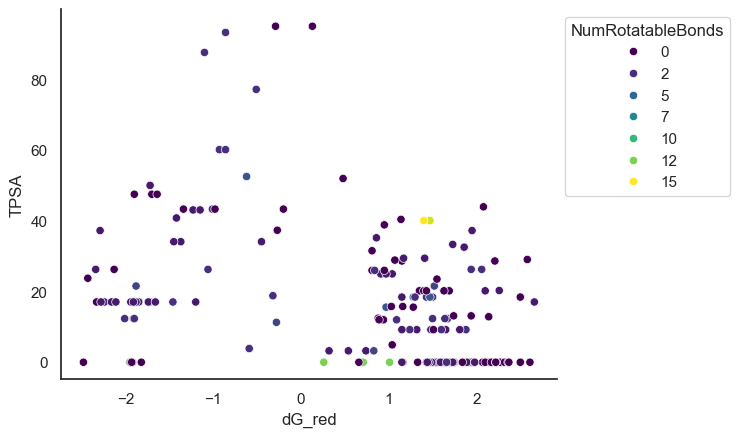

In [60]:
sns.set_style('white') # Try 'darkgrid', 'whitegrid', 'dark', 'white', 'ticks'
sns.set_context('notebook') # Try 'paper', 'poster', 'notebook' and see how it changes the looks

#plt.yscale('log')
#plt.xscale('linear')
ax = sns.scatterplot(data=output_data, x='dG_red', y='TPSA', hue='NumRotatableBonds',
                      legend='brief', palette='viridis')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

sns.despine()

LogP

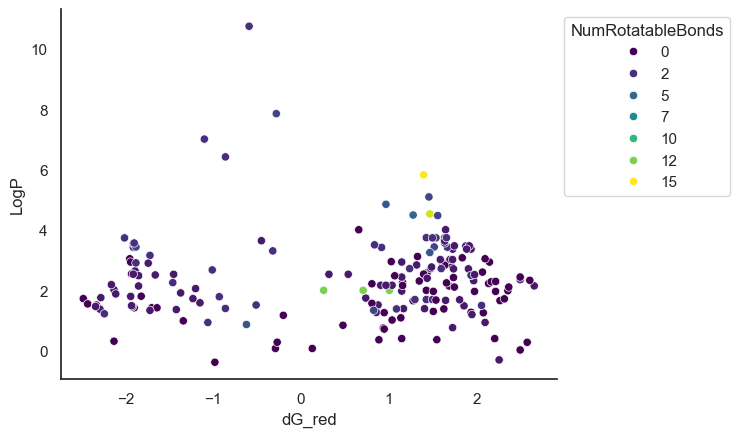

In [61]:
sns.set_style('white') # Try 'darkgrid', 'whitegrid', 'dark', 'white', 'ticks'
sns.set_context('notebook') # Try 'paper', 'poster', 'notebook' and see how it changes the looks

#plt.yscale('log')
#plt.xscale('linear')
ax = sns.scatterplot(data=output_data, x='dG_red', y='LogP', hue='NumRotatableBonds',
                      legend='brief', palette='viridis')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

sns.despine()

FractionCSP3

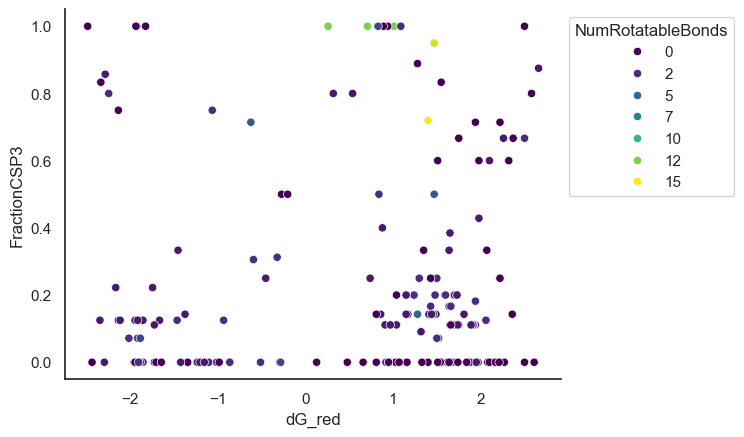

In [62]:
sns.set_style('white') # Try 'darkgrid', 'whitegrid', 'dark', 'white', 'ticks'
sns.set_context('notebook') # Try 'paper', 'poster', 'notebook' and see how it changes the looks

#plt.yscale('log')
#plt.xscale('linear')
ax = sns.scatterplot(data=output_data, x='dG_red', y='FractionCSP3', hue='NumRotatableBonds',
                      legend='brief', palette='viridis')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

sns.despine()

NumRotatableBonds
NumRings
NumHBD
NumHBA
